<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m8_VISION%20%EC%9D%91%EC%9A%A9/vision_03_CNN%EC%8B%A4%EC%8A%B5_0910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kaggle 데이터 내려받기
1. 캐글 API Token 발급
- 캐글 사이트 account 페이지 이동 > API 섹션 내 CREATE NEW API TOKEN 클릭 > 다운로드된 파일 kaggle.json 확인

https://www.kaggle.com/settings

In [ ]:
!pip install kaggle

In [ ]:
# 이후에 google colab이 제공하는 file을 통해 kaggle json 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hyojunyee","key":"70e9b1ee7ec01c519a85dea02e43c9a5"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  kaggle.json  sample_data


권한을 세 자리로 나타내는 방식:
- 첫 번째 숫자 (6): **파일 소유자(owner)**에 대한 권한을 나타냅니다.
- 두 번째 숫자 (0): **그룹(group)**에 대한 권한을 나타냅니다.
- 세 번째 숫자 (0): **기타 사용자(others)**에 대한 권한을 나타냅니다.

각 숫자는 다음과 같이 구성됩니다:
- 4: 읽기 권한 (read)
- 2: 쓰기 권한 (write)
- 1: 실행 권한 (execute)
- 0: 아무 권한 없음

**Ex:**\
`-rw-r--r-- 1 root root    0  2월 24 16:20 testfile2`

||||
|------|---|---|
|-|파일표시|- : 파일, d :폴더/디렉토리, l : 링크|
|rw-|소유자 권한|r : 읽기, w : 쓰기, x : 실행|
|r--|그룹 권한|r : 읽기, w : 쓰기, x : 실행|
|r--|다른 사용자 권한|r : 읽기, w : 쓰기, x : 실행|
|l|링크 수||
|root|소유자||
|root|소유자 그룹||
|0|파일크기||
|2월 24일 16:20|수정한 날짜||
|testfile2|파일 이름||

testfile2파일의 소유자는 root이고
권한은 소유자(읽기/쓰기)권한, 그룹(읽기)권한, 다른 사용자(읽기)권한

In [ ]:
# .kaggle 디렉토리 생성
!mkdir -p ~/.kaggle

# json 파일 .kaggle 디렉토리로 이동
!cp kaggle.json ~/.kaggle/

# 권한 변경
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !ls ~/.kaggle/ -a

In [ ]:
# 사용자의 홈 디렉토리(-)내의 파일과 디렉토리 목록을 자세한 정보와 함께 나열
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Sep 10 01:27 .
drwx------ 1 root root 4096 Sep 10 01:27 ..
-rw------- 1 root root   65 Sep 10 01:27 kaggle.json


In [ ]:
# Kaggle CLI 도구는 Kaggle의 API를 사용하여 데이터셋을 다운로드하고, Kaggle 대회에 참가하며, 데이터셋을 업로드 하는 등 다양한 기능을 제공
!pip install --upgrade kaggle

In [ ]:
!kaggle --version

Kaggle API 1.6.17


In [ ]:
!pip show kaggle

Name: kaggle
Version: 1.6.17
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats?rvi=1

Copy Api command > kaggle datasets download -d biaiscience/dogs-vs-cats

In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 99% 812M/817M [00:09<00:00, 93.0MB/s]
100% 817M/817M [00:09<00:00, 90.5MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [ ]:
!unzip --qq dogs-vs-cats.zip

In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [ ]:
!ls train

train


In [ ]:
# !mv 파일의 디렉토리를 이동(move)하거나, 이름을 변경(rename)할 때 사용
!mv train train1
!mv test test1

In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test1  train1


In [ ]:
!mv /content/train1/train /content/
!mv /content/test1/test /content/

In [ ]:
!rm -rf test1 train1

In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [ ]:
!ls train/

cat.0.jpg      cat.1966.jpg  cat.5180.jpg  cat.8396.jpg   dog.1160.jpg	 dog.3575.jpg  dog.6790.jpg
cat.10000.jpg  cat.1967.jpg  cat.5181.jpg  cat.8397.jpg   dog.11610.jpg  dog.3576.jpg  dog.6791.jpg
cat.10001.jpg  cat.1968.jpg  cat.5182.jpg  cat.8398.jpg   dog.11611.jpg  dog.3577.jpg  dog.6792.jpg
cat.10002.jpg  cat.1969.jpg  cat.5183.jpg  cat.8399.jpg   dog.11612.jpg  dog.3578.jpg  dog.6793.jpg
cat.10003.jpg  cat.196.jpg   cat.5184.jpg  cat.839.jpg	  dog.11613.jpg  dog.3579.jpg  dog.6794.jpg
cat.10004.jpg  cat.1970.jpg  cat.5185.jpg  cat.83.jpg	  dog.11614.jpg  dog.357.jpg   dog.6795.jpg
cat.10005.jpg  cat.1971.jpg  cat.5186.jpg  cat.8400.jpg   dog.11615.jpg  dog.3580.jpg  dog.6796.jpg
cat.10006.jpg  cat.1972.jpg  cat.5187.jpg  cat.8401.jpg   dog.11616.jpg  dog.3581.jpg  dog.6797.jpg
cat.10007.jpg  cat.1973.jpg  cat.5188.jpg  cat.8402.jpg   dog.11617.jpg  dog.3582.jpg  dog.6798.jpg
cat.10008.jpg  cat.1974.jpg  cat.5189.jpg  cat.8403.jpg   dog.11618.jpg  dog.3583.jpg  dog.6799.jpg
cat.

In [ ]:
# 원본 이미지 데이터셋에서 일부 데이터를 추출하여 새로운 하위 데이터셋을 생성
# 이 하위 데이터셋은 훈련, 검증, 테스트의 세가지 부분으로 구성
import os, shutil, pathlib

# pathlib의 주요 기능으로는 경로조작, 파일 시스템 정보 조회, 파일/디렉토리 생성 및 삭제 등이 있음.
original_dir = pathlib.Path("train")                # 'train' 폴더를 원본 데이터셋의 디렉토리로 설정
new_base_dir = pathlib.Path("cats_vs_dogs_small")   # 'cats_vs_dogs_small' 폴더를 새로운 데이터셋의 베이스 디렉토리로 설정

# 새로운 데이터셋의 디렉토리를 생성
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):                     # 각 카테고리에 대해 작업을 수행
        dir = new_base_dir / subset_name / category     # 각 카테고리의 새로운 디렉토리 경로를 생성
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,   # shutil.copyfile을 사용하여 원본 디렉토리에서 새 디렉토리로 이미지 파일을 복사
                            dst=dir / fname)            # 원본 디렉토리에서 해당 파일을 복사하여 새 디렉토리에 붙여넣기

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
!ls cats_vs_dogs_small/

test  train  validation


### 모델 만들기

강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(180, 180, 3))    # 높이와 너비가 각각 180픽셀이며 3개의 채널(RGB)을 가진 이미지 입력
x = layers.Rescaling(1./255)(inputs)            # 입력 이미지의 픽셀 값을 [0,1] 범위로 재조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)      # 32개의 필터를 사용하며, 각 필터의 크기는 3x3
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

모델 훈련 설정하기

RMSprop (Root Mean Square Propagation)
- RMSprop은 적응적 학습률을 사용하여 가중치 업데이트를 할 때 각 매개변수에 대해 개별적인 학습률을 적용합니다. 기본 아이디어는 각 매개변수의 그라디언트의 최근 크기를 사용해 학습률을 조정하는 것입니다. 이 방식은 그라디언트가 크게 변동하는 경우 학습률을 낮추고, 그라디언트가 안정되면 학습률을 높이는 효과가 있습니다.

Adam (Adaptive Moment Estimation)
- Adam은 RMSprop의 장점에 **모멘텀(Momentum)**의 개념을 추가한 알고리즘입니다. 그라디언트의 1차 모멘트(평균)와 2차 모멘트(제곱 평균)을 모두 추적합니다. 즉, 그라디언트의 크기와 방향을 모두 고려하여 가중치를 업데이트합니다. 이러한 방식은 RMSprop보다 더 안정적이고 빠른 수렴을 가능하게 합니다.

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리
`image_dataset_from_directory`를 사용하여 이미지 읽기 \
TensorFlow Keras의 `image_dataset_from_directory` 함수를 사용하여 디렉토리에 저장된 이미지 데이터로부터 데이터 세트를 생성

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 텐서플로우 데이터 세트 객체 이해

#### Dataset 이 반환하는 데이터와 레이블 크기 확인하기

In [ ]:
for image_batch, labels_batch in train_dataset:
  print("데이터 배치 크기:", image_batch.shape)
  print("레이블 배치 크기:", labels_batch.shape)
  break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


#### Dataset 을 사용해 모델 훈련하기

In [ ]:
# ModelCheckpoint 콜백을 사용하여 훈련 도중에 모델을 전달
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",  # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.5174 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.5148 - loss: 0.6932 - val_accuracy: 0.5280 - val_loss: 0.6817
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.5723 - loss: 0.6898 - val_accuracy: 0.6100 - val_loss: 0.6620
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.6011 - loss: 0.6799 - val_accuracy: 0.5960 - val_loss: 0.6571
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6337 - loss: 0.6311 - val_accuracy: 0.6020 - val_loss: 0.6664
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.6904 - loss: 0.6161 - val_accuracy: 0.7000 - val_loss: 0.5706
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7265 - loss: 0.5620 - val_accuracy: 0.7120 - val_loss: 0.5544
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7441 - loss: 0.5344 - val_accuracy: 0.670

#### 훈련 정확도와 손실 그래프 그리기

<ipython-input-31-7abdd19506c1>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy", color='red')
<ipython-input-31-7abdd19506c1>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, "b", label="Validation loss", color='red')


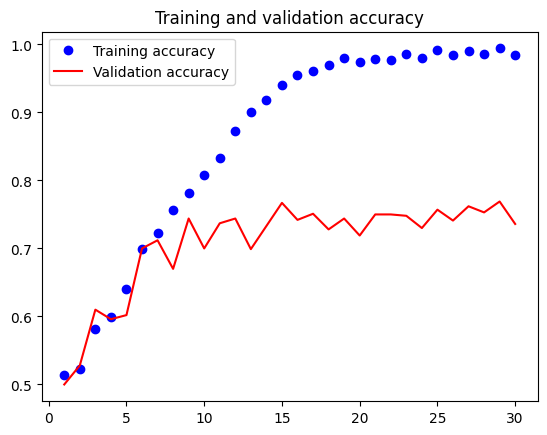

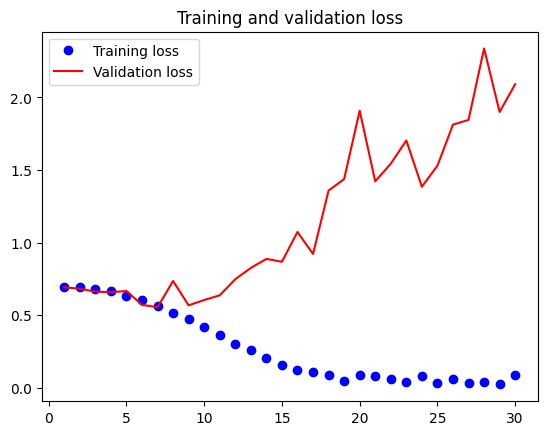

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy", color='red')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss", color='red')
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Early Stop을 적용

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",  # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss"
    ),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
]

# EarlyStopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # 모니터링 대상 성능 지표
    patience=10,        # 성능 개선이 없는 에폭을 몇번까지 허용 할지 설정
    verbose=1,          # 로그를 출력
)

history1 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[callbacks, early_stopping]    # 콜백 리스트에 추가
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9933 - loss: 0.0163 - val_accuracy: 0.7200 - val_loss: 2.3550
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.7390 - val_loss: 2.2785
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9813 - loss: 0.0693 - val_accuracy: 0.7330 - val_loss: 2.8020
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9910 - loss: 0.0402 - val_accuracy: 0.7450 - val_loss: 2.2571
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9867 - loss: 0.0605 - val_accuracy: 0.7340 - val_loss: 2.3009
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.9950 - loss: 0.0230 - val_accuracy: 0.7210 - val_loss: 2.8630
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.9908 - loss: 0.0445 - val_accuracy: 0.7130 - val_loss: 2.9509
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9921 - loss: 0.0386 - val_accuracy: 0.7520 -

In [ ]:
# # EarlyStopping 콜백 설정
# callbacks_list = [
#     tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
# ),
#     tf.keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch.keras",  # 저장된 파일의 이름
#         save_best_only=True,
#         monitor="val_loss"
#     )
# ]

# history1 = model.fit(
#     train_dataset,
#     epochs=30,
#     validation_data=validation_dataset,
#     callbacks=callbacks_list
# )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9949 - loss: 0.0394 - val_accuracy: 0.7460 - val_loss: 3.2198
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.7220 - val_loss: 3.4199
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9891 - loss: 0.0384 - val_accuracy: 0.7460 - val_loss: 3.1926
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9917 - loss: 0.0250 - val_accuracy: 0.7480 - val_loss: 3.1697
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9899 - loss: 0.0977 - val_accuracy: 0.7430 - val_loss: 3.1155
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9981 - loss: 0.0114 - val_accuracy: 0.7540 - val_loss: 3.2590
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.9965 - loss: 0.0152 - val_accuracy: 0.7260 - val_loss: 4.6353
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.9933 - loss: 0.0456 - val_accuracy: 0.7390 

<ipython-input-34-7d4d662ba8e3>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy", color='red')
<ipython-input-34-7d4d662ba8e3>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, "b", label="Validation loss", color='red')


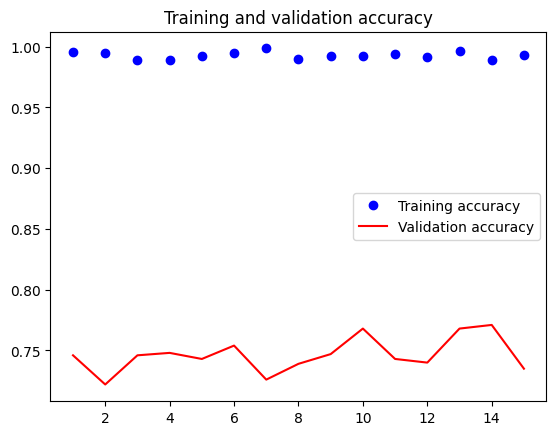

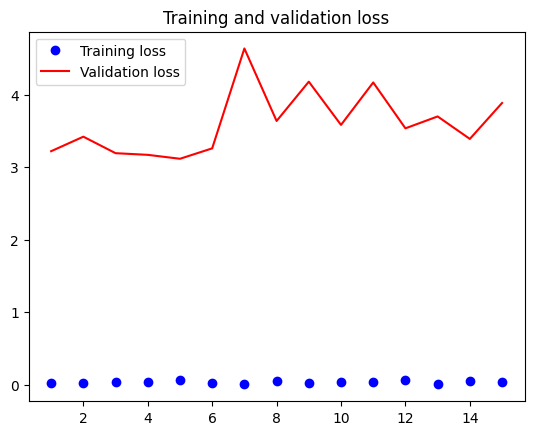

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy", color='red')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss", color='red')
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### 테스트 세트에서 모델 평가하기

In [ ]:
!ls

cats_vs_dogs_small	    dogs-vs-cats.zip  kaggle.json  test
convnet_from_scratch.keras  drive	      sample_data  train


In [ ]:
test_model = tf.keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7416 - loss: 2.9511
Test accuracy: 0.730


### 데이터 증식 사용하기


#### 컨브넷에 추가할 데이터 증식 단계 정의하기
세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [ ]:
data_augumentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

랜덤하게 증식된 훈련 이미지 출력하기

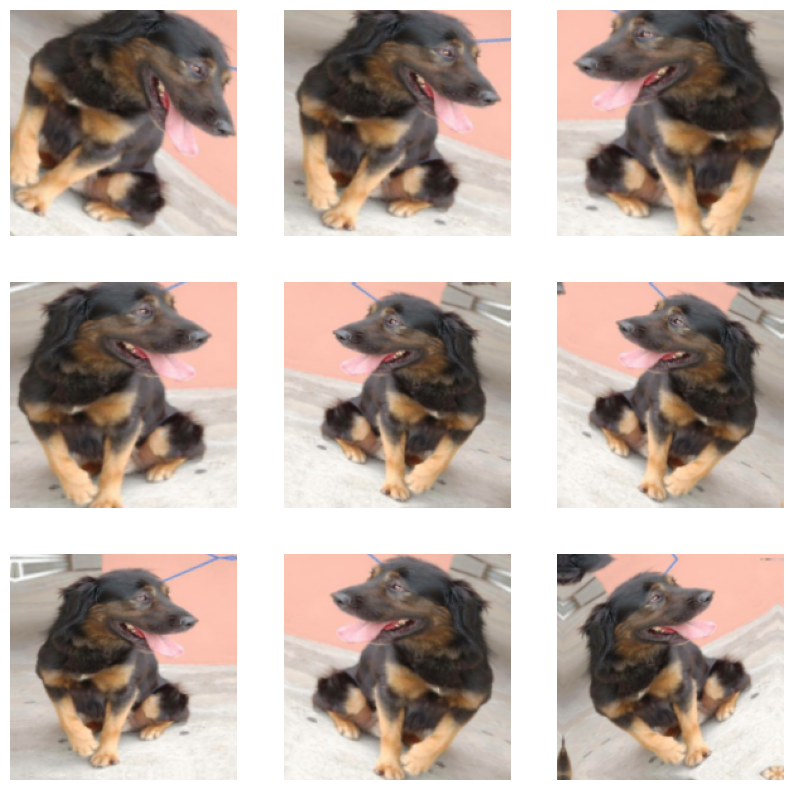

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):     # 학습 데이터셋에서 하나의 배치를 가져오기
    for i in range(9):
        augmented_images = data_augumentation(images)
        ax = plt.subplot(3, 3, i + 1)
        # "unit8"은 0부터 255까지의 값을 가질 수 있는 8비트 정수 타입을 의미하며, 이는 이미지 데이터를 표현하는 데 일반적으로 사용되는 데이터타입
        # astype("unit8")을 호출함으로써, 이미지 데이터가 해당 범위내에 있도록 보장
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

이미지 증식과 드롭아웃을 포함한 컨브넷 만들기
- epoch 마다 입력 데이터를 무작위로 변형하여 모델이 다양한 데이터를 학습하도록 도와주지만, 실제 데이터의 수는 증식 전과 동일하게 유지

In [ ]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augumentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

컨브넷 훈련하기

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.5065 - loss: 0.7083 - val_accuracy: 0.5060 - val_loss: 0.6925
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5334 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.7369
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5138 - loss: 0.6973 - val_accuracy: 0.5960 - val_loss: 0.6818
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.5794 - loss: 0.6817 - val_accuracy: 0.6540 - val_loss: 0.6308
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.6223 - loss: 0.6424 - val_accuracy: 0.6470 - val_loss: 0.6238
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6503 - loss: 0.6223 - val_accuracy: 0.6490 - val_loss: 0.6271
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.6631 - loss: 0.6244 - val_accuracy: 0.6170 - val_loss: 0.6397
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6842 - loss: 0.5988 - val_accuracy

In [ ]:
test_model = tf.keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8260 - loss: 0.4396
Test accuracy: 0.818


## 사전 훈련된 모델 활용하기

### 사전 훈련된 모델을 사용한 특성추출

ImageNet 데이터셋

- ImageNet은 컴퓨터 비전 분야에서 매우 유명한 대규모 데이터셋입니다.
- 이 데이터셋은 1,000개의 클래스로 구성되어 있으며, 각 클래스에는 다양한 객체가 포함되어 있습니다. 예를 들어, 동물, 식물, 사물 등의 카테고리가 있습니다.
- 1,400만 개 이상의 이미지로 이루어져 있으며, 각 이미지에는 하나 이상의 객체에 대한 레이블이 붙어 있습니다.
- VGG16 모델은 **ILSVRC (ImageNet Large Scale Visual Recognition Challenge)**에서 사용된 1000개의 클래스에 대한 데이터를 사용해 훈련되었습니다. 이 챌린지는 이미지 분류, 객체 탐지 등의 다양한 비전 작업을 위한 벤치마크입니다.

#### VGG16 합성곱 기반 층 만들기

include_top=False의 default 값은 True

- include_top=True: VGG16 모델의 마지막에 있는 완전 연결 분류기 층(3개의 Dense 층과 마지막 Softmax 층)이 포함됩니다. 이는 주로 ImageNet 데이터셋과 동일한 1,000개의 클래스를 분류할 때 사용됩니다.
- include_top=False: VGG16 모델의 상단 분류기 부분을 제외하고, 합성곱층 기반만을 사용합니다. 이 옵션은 특징 추출(feature extraction) 작업에 유용하며, 마지막 층을 사용자의 문제에 맞게 재구성하거나 새로운 분류기를 추가할 수 있습니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

vgg16 = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",     # 모델에 ImageNet 데이터베이스에서 훈련된 가중치를 사용하겠다는 의미
    input_shape=(224, 224, 3)
)
vgg16.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
conv_base = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",     # 모델에 ImageNet 데이터베이스에서 훈련된 가중치를 사용하겠다는 의미
    include_top=False,      # ImageNet의 클레스 1000개에 대응되는 밀집 연결 분류기의 포함 여부
    input_shape=(180, 180, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)      # VGG16 모델에 맞춰 이미지를 전처리하는 과정
        features = conv_base.predict(preprocessed_images)       # 전처리된 이미지를 입력받아 그에 대한 특징을 추출. 출력은 클래스 예측이 아닌, 이미지의 특징 맵
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)     # 각 배치마다 추출된 특징과 레이블을 하나의 배열로 결합

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

In [ ]:
train_features.shape

(2000, 5, 5, 512)

####  밀집 연결 분류기 정의하고 훈련하기

In [ ]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8768 - loss: 38.3006 - val_accuracy: 0.9370 - val_loss: 10.7200
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9628 - loss: 5.4774 - val_accuracy: 0.9570 - val_loss: 5.7293
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9875 - loss: 1.4195 - val_accuracy: 0.9750 - val_loss: 4.1134
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 1.7530 - val_accuracy: 0.9750 - val_loss: 4.5184
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9940 - loss: 0.4703 - val_accuracy: 0.9600 - val_loss: 7.9312
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9857 - loss: 2.3819 - val_accuracy: 0.9560 - val_loss: 10.0985
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9937 - loss: 0.4919 - val_accuracy: 0.9730 - val_loss: 4.2753
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9979 - loss: 0.2616 - val_accuracy: 0.9730 - val_l

#### 결과를 그래프로 그리기

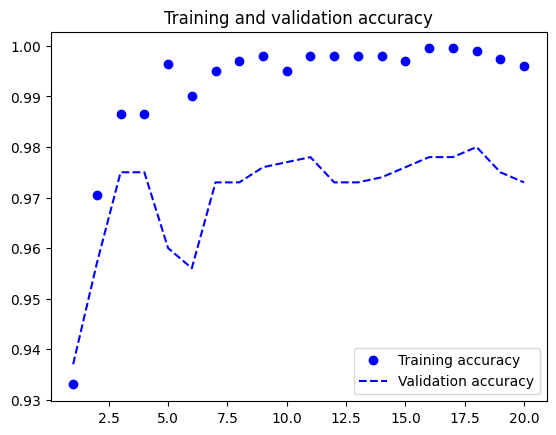

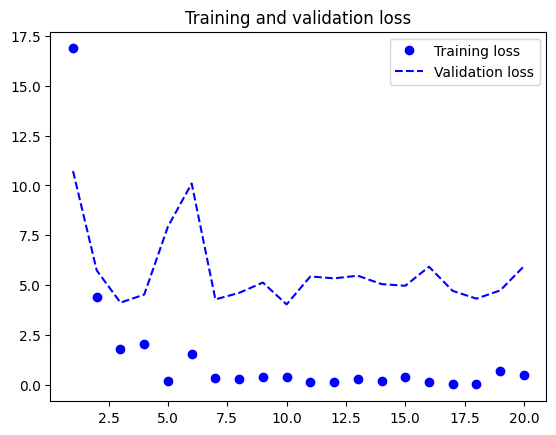

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = tf.keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9806 - loss: 3.7547
Test accuracy: 0.977


**전이 학습(Transfer Learning)**은 **이미 훈련된 모델**의 가중치를 새로운 문제에 적용하여 **재학습**하는 방법입니다. 이 방법은 특히 **큰 데이터셋**과 **복잡한 모델**이 필요한 딥러닝에서 매우 유용합니다. 전이 학습의 핵심 개념은 **한 도메인에서 학습한 지식을 다른 도메인**에 전이하는 것입니다.

### 전이 학습의 주요 아이디어
일반적으로 전이 학습은 다음과 같은 흐름을 따릅니다:

1. **사전 훈련된 모델 사용**:
   - 전이 학습에서 사전 훈련된 모델은 보통 **ImageNet** 같은 대규모 데이터셋에서 학습된 모델을 의미합니다.
   - 예를 들어, **VGG16**, **ResNet**, **Inception**과 같은 딥러닝 모델들은 수백만 개의 이미지를 사용해 사물 분류에 대한 특징을 학습한 상태입니다.

2. **특징 추출**:
   - 사전 훈련된 모델의 **초기 계층(저수준 특징 추출기)**은 **경계선, 질감, 색상**과 같은 일반적인 특징을 학습합니다.
   - 이 부분을 유지하면서, 특정 문제에 맞게 **모델의 상단 층**(보통 **분류기 층**)을 재구성하여 새로운 데이터셋에 맞는 분류를 학습시킬 수 있습니다.

3. **미세 조정(Fine-tuning)**:
   - 전이 학습에서 일반적으로 모델의 상단 일부만을 새 데이터셋에 맞게 재학습(fine-tuning)하거나, 사전 훈련된 가중치를 **고정(freeze)**하고 최상단 분류층만 학습시키는 방식이 사용됩니다.
   - 일부 경우에는 사전 훈련된 모델 전체에 대해 **미세 조정(fine-tuning)**을 수행하여 모델이 새로운 데이터셋에 맞게 더욱 잘 적응할 수 있도록 합니다.

### 전이 학습의 주요 단계

1. **사전 훈련된 모델 로드**:
   - ImageNet과 같은 대규모 데이터셋으로 학습된 모델을 로드합니다.
   - 모델의 구조와 가중치를 가져옵니다. 이때, `include_top=False`로 설정하여 모델의 마지막 분류층을 제외하고, 특징 추출에만 사용되는 합성곱 계층들을 사용할 수 있습니다.

2. **모델 동결(Freeze)**:
   - 학습된 가중치를 **고정(freeze)**하여 초기 계층의 가중치가 업데이트되지 않도록 설정합니다. 이는 모델이 기존 학습된 정보를 유지하면서 새로운 데이터셋에 적응하도록 하기 위함입니다.

3. **새 분류기 추가**:
   - 사전 훈련된 모델의 마지막 계층 위에 **새로운 분류기**(Dense Layer나 Softmax Layer 등)를 추가하여, 새로운 문제에 맞는 레이블로 모델이 학습할 수 있도록 합니다.
   - 예를 들어, 고양이와 개를 분류하는 문제라면 두 개의 출력 뉴런을 가진 분류층을 추가할 수 있습니다.

4. **새 데이터로 학습**:
   - 새로운 데이터셋을 사용해 모델을 **재학습**합니다. 이때, 일부 계층은 고정된 채로 유지하고, 새로운 분류기 층만 학습시키거나 전체 모델을 미세 조정할 수 있습니다.

### 전이 학습의 장점

1. **적은 데이터로도 학습 가능**:
   - 새로운 문제에 대해 학습할 때, 사전 훈련된 모델이 기존에 학습한 정보가 이미 포함되어 있으므로 **작은 데이터셋**으로도 좋은 성능을 얻을 수 있습니다. 이는 특히 대규모 데이터셋을 확보하기 어려운 경우에 유리합니다.

2. **시간과 자원 절약**:
   - 모델을 처음부터 학습시키지 않고 사전 훈련된 모델을 사용하므로 **훈련 시간과 자원**을 절약할 수 있습니다.

3. **성능 향상**:
   - 사전 훈련된 모델이 큰 데이터셋에서 학습한 **일반적인 패턴**을 활용할 수 있어, 더 빠르게 **좋은 성능**을 얻을 수 있습니다.

### 전이 학습의 예시

#### 1. **이미지 분류**
   - **ImageNet**에서 사전 훈련된 모델(VGG, ResNet 등)을 가져와, 다른 데이터셋(예: 고양이와 개를 구분하는 데이터셋)에서 학습을 수행할 수 있습니다.
   
#### 2. **객체 탐지(Object Detection)**
   - 전이 학습은 **YOLO**나 **Faster R-CNN** 같은 객체 탐지 모델에서도 사용됩니다. 사전 훈련된 모델을 기반으로 특정 도메인의 객체를 탐지하는 데 활용됩니다.

#### 3. **자연어 처리(NLP)**
   - NLP 분야에서는 **BERT**, **GPT**와 같은 사전 훈련된 모델이 다양한 언어 이해 및 생성 작업에 활용됩니다. 새로운 텍스트 데이터에 맞게 미세 조정하여 번역, 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.

전이 학습은 **사전 훈련된 모델을 기반으로 새로운 문제를 해결**하는 방법으로, 특히 **소량의 데이터**로도 **효율적으로 학습**할 수 있는 방법입니다. 사전 훈련된 모델이 일반적인 패턴을 학습한 상태에서, 새로운 도메인에 맞게 상위층을 재학습하거나 전체 모델을 미세 조정하는 방식으로 사용됩니다. 전이 학습은 **이미지 분류**, **객체 탐지**, **자연어 처리** 등 다양한 딥러닝 분야에서 매우 널리 사용되고 있습니다.